<a href="https://colab.research.google.com/github/polaris428/-Survival-Socket.io/blob/main/%20Differentiate%20between%20apples%20and%20tomatoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
import pathlib
dataset_url = "https://docs.google.com/uc?export=download&id=1OTIpqAYvAGlU1xrxo_WGlz1KwX_F1VCd&confirm=t"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='fruit',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

9648


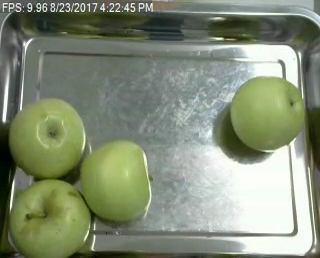

In [7]:
apple = list(data_dir.glob('Apple/*'))
PIL.Image.open(str(apple[0]))

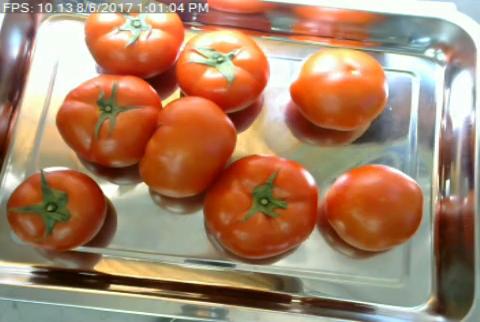

In [8]:
Tomatoes = list(data_dir.glob('Tomatoes/*'))
PIL.Image.open(str(Tomatoes[1]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10206 files belonging to 3 classes.
Using 8165 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10206 files belonging to 3 classes.
Using 2041 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Orange', 'Tomatoes']


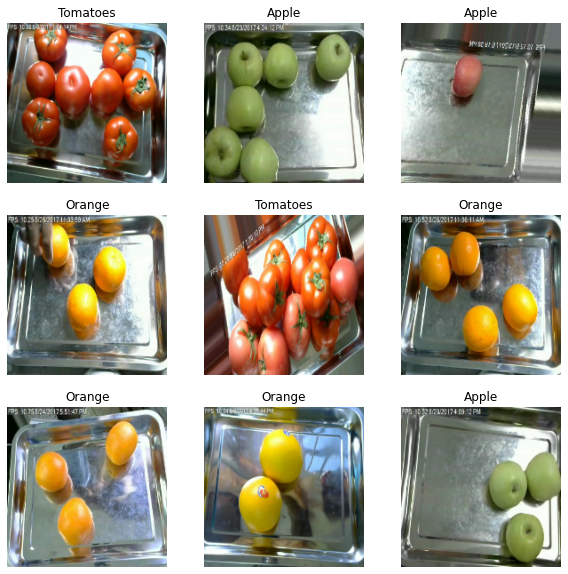

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [19]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [20]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
256/256 [==============================] - 353s 1s/step - loss: 0.2211 - accuracy: 0.9132 - val_loss: 0.0791 - val_accuracy: 0.9721
Epoch 2/5
256/256 [==============================] - 311s 1s/step - loss: 0.0399 - accuracy: 0.9864 - val_loss: 0.0208 - val_accuracy: 0.9936
Epoch 3/5
256/256 [==============================] - 308s 1s/step - loss: 0.0225 - accuracy: 0.9922 - val_loss: 0.0186 - val_accuracy: 0.9936
Epoch 4/5
256/256 [==============================] - 310s 1s/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0397 - val_accuracy: 0.9907
Epoch 5/5
256/256 [==============================] - 314s 1s/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0438 - val_accuracy: 0.9882


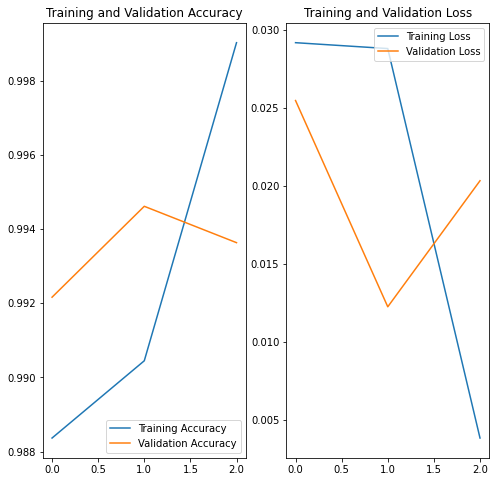

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [25]:
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
256/256 [==============================] - 313s 1s/step - loss: 0.0292 - accuracy: 0.9884 - val_loss: 0.0255 - val_accuracy: 0.9922
Epoch 2/3
256/256 [==============================] - 305s 1s/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0123 - val_accuracy: 0.9946
Epoch 3/3
256/256 [==============================] - 307s 1s/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0203 - val_accuracy: 0.9936


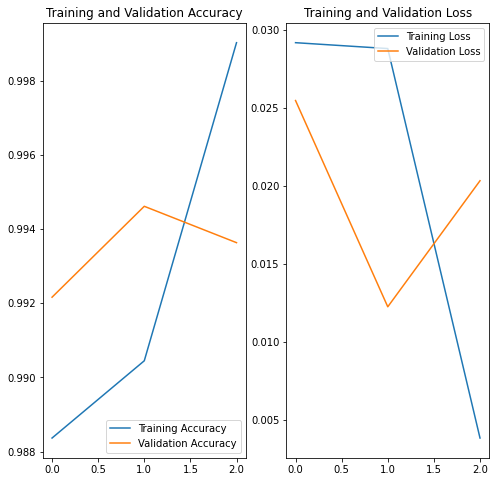

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
sunflower_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMfVHIwfC7RDHuCd24LfzQkz9l3Ziu28xeoJgIp42aKe6xWEZxDfq-nhao-oZ_5YYcFyE&usqp=CAU"
sunflower_path = tf.keras.utils.get_file('test6', origin=sunflower_url)

img =tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) 

16384/7583 [================================================================] - 0s 0us/step
This image most likely belongs to Orange with a 100.00 percent confidence.
